In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [18]:
url = 'https://fbref.com/en/comps/182/NWSL-Stats'

df = pd.read_html(url, attrs={'id': 'results20241821_overall'})[0]

In [5]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Pride,10,7,3,0,18,9,9,24,2.4,17.3,10.0,7.4,0.74,W W W W W,6473,Barbra Banda - 6,Anna Moorhouse,NaN
1,2,Current,10,6,4,0,25,15,10,22,2.2,21.1,9.8,11.3,1.13,W D D W D,6900,Temwa Chawinga - 5,Adrianna Franch,NaN
2,3,Spirit,10,7,0,3,22,14,8,21,2.1,17.6,11.3,6.3,0.63,L W L W W,7996,Ouleymata Sarr - 5,Aubrey Kingsbury,NaN
3,4,Thorns,10,6,1,3,23,14,9,19,1.9,16.3,13.0,3.3,0.33,W W W W W,18279,Sophia Smith - 8,Shelby Hogan,NaN
4,5,Red Stars,10,5,1,4,15,14,1,16,1.6,13.4,13.8,-0.4,-0.04,L L W W L,2763,Allyson Schlegel - 4,Alyssa Naeher,NaN


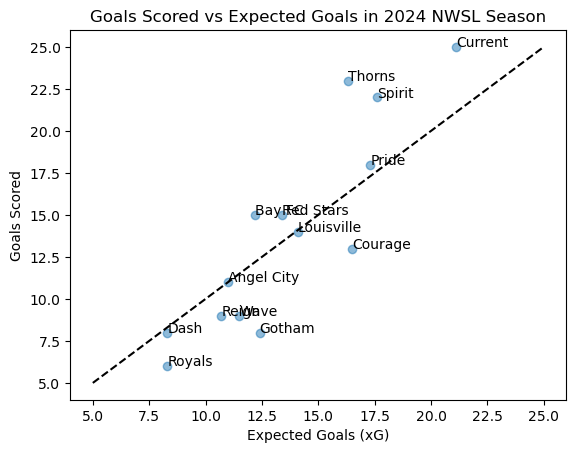

In [16]:
fig, ax = plt.subplots()

ax.scatter(df['xG'], df['GF'], alpha=.5)

ax.set_xlabel('Expected Goals (xG)')
ax.set_ylabel('Goals Scored')
ax.set_title('Goals Scored vs Expected Goals in 2024 NWSL Season')

ax.plot([5,25], [5,25], color='black', linestyle='--')


df['difference'] = df['GF'] - df['xG']

overperformers = df.nlargest(7, 'difference')
underperformers = df.nsmallest(7, 'difference')

for i in range(7):
    ax.text(overperformers.iloc[i]['xG'], overperformers.iloc[i]['GF'],
            overperformers.iloc[i]['Squad'])
    ax.text(underperformers.iloc[i]['xG'], underperformers.iloc[i]['GF'],
            underperformers.iloc[i]['Squad'])